In [32]:
import numpy as np 
import pandas as pd


In [33]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold,StratifiedKFold
from sklearn.metrics import mean_squared_error
from catboost import CatBoostRegressor
from catboost import Pool

In [35]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
fulfilment_center = pd.read_csv("fulfilment_center_info.csv")
meal_info = pd.read_csv("meal_info.csv")

In [36]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456548 entries, 0 to 456547
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 31.3 MB


In [37]:
test.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32573 entries, 0 to 32572
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     32573 non-null  int64  
 1   week                   32573 non-null  int64  
 2   center_id              32573 non-null  int64  
 3   meal_id                32573 non-null  int64  
 4   checkout_price         32573 non-null  float64
 5   base_price             32573 non-null  float64
 6   emailer_for_promotion  32573 non-null  int64  
 7   homepage_featured      32573 non-null  int64  
dtypes: float64(2), int64(6)
memory usage: 2.0 MB


In [38]:
test.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32573 entries, 0 to 32572
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     32573 non-null  int64  
 1   week                   32573 non-null  int64  
 2   center_id              32573 non-null  int64  
 3   meal_id                32573 non-null  int64  
 4   checkout_price         32573 non-null  float64
 5   base_price             32573 non-null  float64
 6   emailer_for_promotion  32573 non-null  int64  
 7   homepage_featured      32573 non-null  int64  
dtypes: float64(2), int64(6)
memory usage: 2.0 MB


In [39]:
fulfilment_center.head()

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6


In [40]:
meal_info.head()


,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian


In [41]:
meal_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   meal_id   51 non-null     int64 
 1   category  51 non-null     object
 2   cuisine   51 non-null     object
dtypes: int64(1), object(2)
memory usage: 1.3+ KB


In [42]:
train = pd.merge(train,fulfilment_center, on = 'center_id')
test = pd.merge(test,fulfilment_center, on = 'center_id')

train = pd.merge(train,meal_info, on = 'meal_id')
test = pd.merge(test,meal_info, on = 'meal_id')


In [43]:
train.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai
1,1018704,2,55,1885,135.83,152.29,0,0,323,647,56,TYPE_C,2.0,Beverages,Thai
2,1196273,3,55,1885,132.92,133.92,0,0,96,647,56,TYPE_C,2.0,Beverages,Thai
3,1116527,4,55,1885,135.86,134.86,0,0,163,647,56,TYPE_C,2.0,Beverages,Thai
4,1343872,5,55,1885,146.50,147.50,0,0,215,647,56,TYPE_C,2.0,Beverages,Thai


In [44]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 456548 entries, 0 to 456547
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
 9   city_code              456548 non-null  int64  
 10  region_code            456548 non-null  int64  
 11  center_type            456548 non-null  object 
 12  op_area                456548 non-null  float64
 13  category               456548 non-null  object 
 14  cuisine                456548 non-nu

C:\Users\91949\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='week', ylabel='num_orders'>

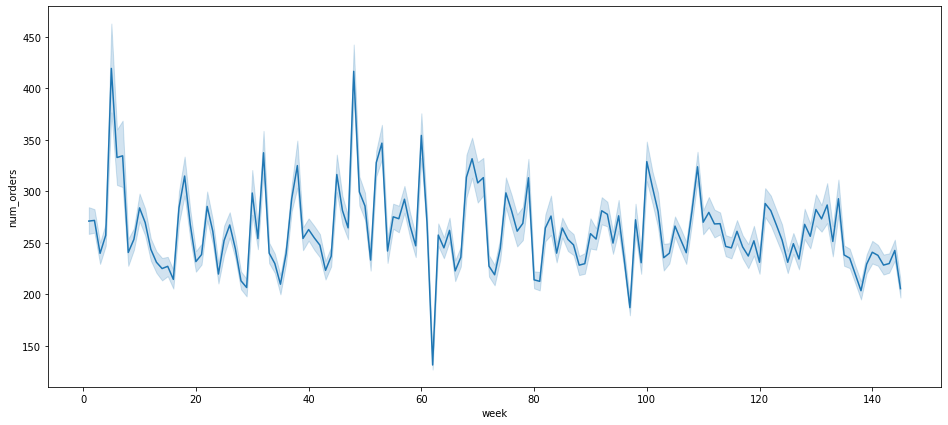

In [45]:
plt.figure(figsize = (16, 7))
sns.lineplot(train['week'], train['num_orders'])

C:\Users\91949\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76]),
 [Text(0, 0, '10'),
  Text(1, 0, '11'),
  Text(2, 0, '13'),
  Text(3, 0, '14'),
  Text(4, 0, '17'),
  Text(5, 0, '20'),
  Text(6, 0, '23'),
  Text(7, 0, '24'),
  Text(8, 0, '26'),
  Text(9, 0, '27'),
  Text(10, 0, '29'),
  Text(11, 0, '30'),
  Text(12, 0, '32'),
  Text(13, 0, '34'),
  Text(14, 0, '36'),
  Text(15, 0, '39'),
  Text(16, 0, '41'),
  Text(17, 0, '42'),
  Text(18, 0, '43'),
  Text(19, 0, '50'),
  Text(20, 0, '51'),
  Text(21, 0, '52'),
  Text(22, 0, '53'),
  Text(23, 0, '55'),
  Text(24, 0, '57'),
  Text(25, 0, '58'),
  Text(26, 0, '59'),
  Text(27, 0, '61'),
  Text(28, 0, '64'),
  Text(29, 0, '65'),
  Text(30, 0, '66'),
  Text(31

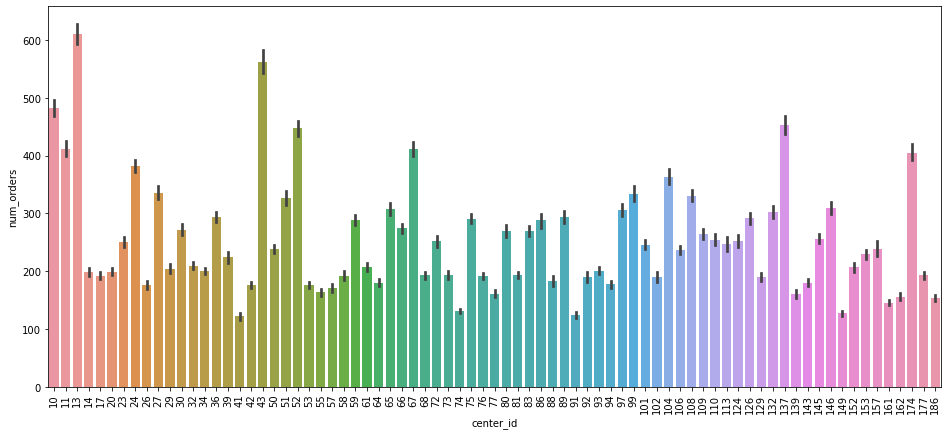

In [18]:
plt.figure(figsize = (16, 7))
sns.barplot(train['center_id'], train['num_orders'])
plt.xticks(rotation = 90)

C:\Users\91949\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='checkout_price', ylabel='num_orders'>

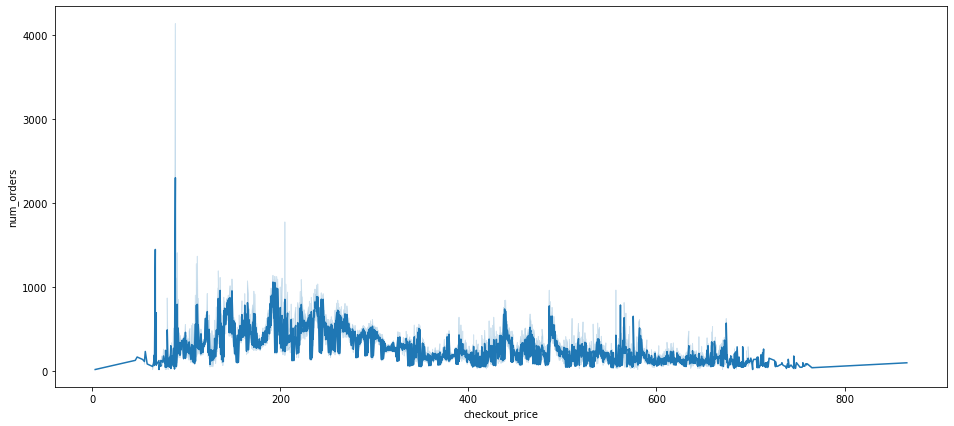

In [47]:
plt.figure(figsize = (16, 7))
sns.lineplot(train['checkout_price'], train['num_orders'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'Beverages'),
  Text(1, 0, 'Rice Bowl'),
  Text(2, 0, 'Starters'),
  Text(3, 0, 'Pasta'),
  Text(4, 0, 'Sandwich'),
  Text(5, 0, 'Biryani'),
  Text(6, 0, 'Extras'),
  Text(7, 0, 'Pizza'),
  Text(8, 0, 'Seafood'),
  Text(9, 0, 'Other Snacks'),
  Text(10, 0, 'Desert'),
  Text(11, 0, 'Salad'),
  Text(12, 0, 'Fish'),
  Text(13, 0, 'Soup')])

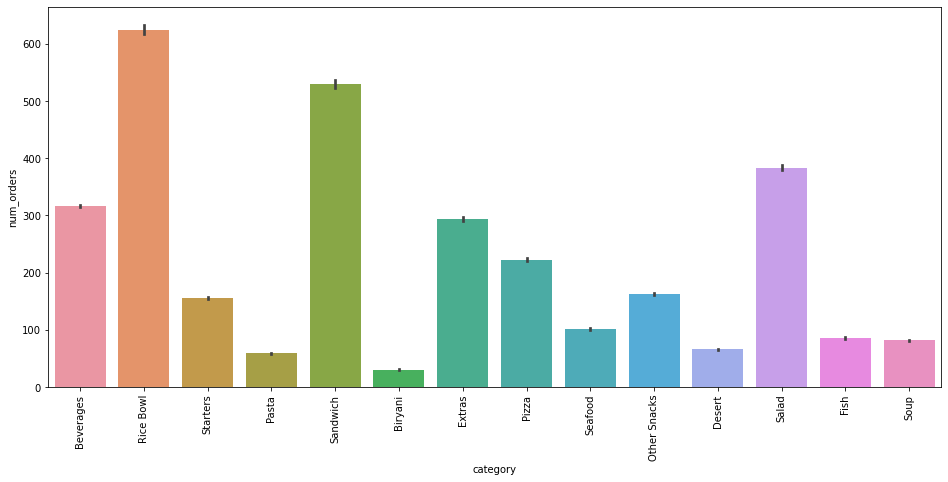

In [48]:
plt.figure(figsize = (16, 7))
sns.barplot(x=train['category'], y=train['num_orders'])
plt.xticks(rotation = '90')

<AxesSubplot:xlabel='cuisine', ylabel='num_orders'>

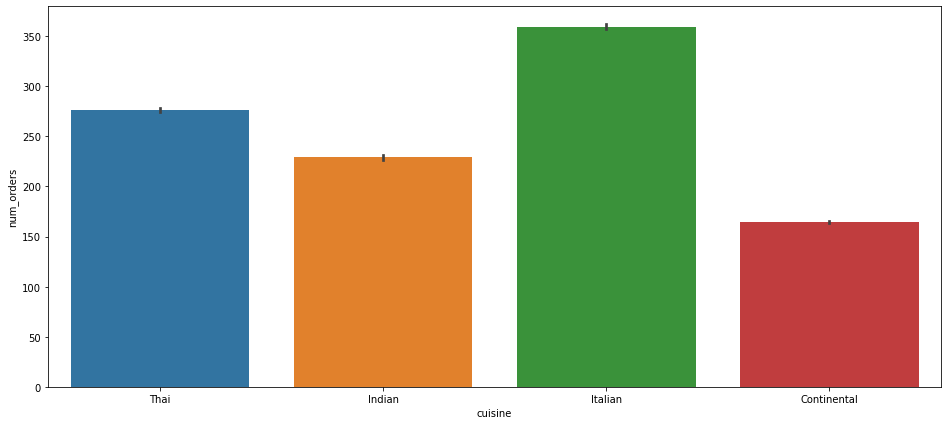

In [49]:
plt.figure(figsize = (16, 7))
sns.barplot(x=train['cuisine'],y= train['num_orders'])

<AxesSubplot:xlabel='region_code', ylabel='num_orders'>

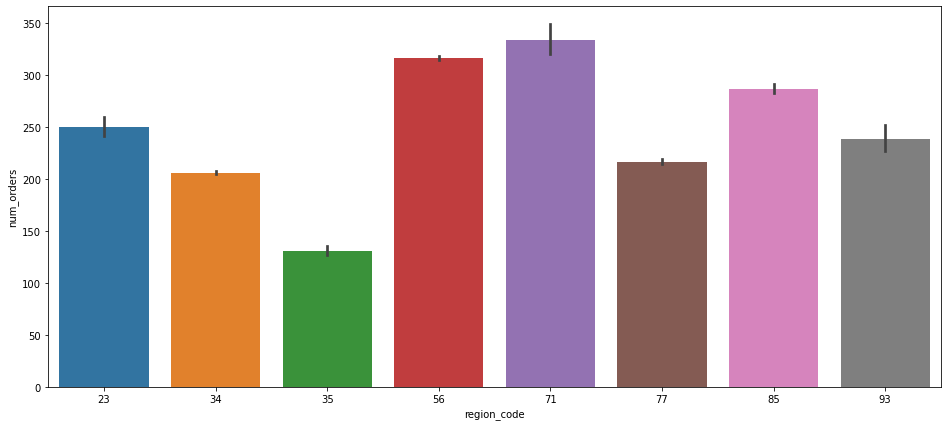

In [50]:
plt.figure(figsize = (16, 7))
sns.barplot(x=train['region_code'],y=train['num_orders'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, '0.9'),
  Text(1, 0, '1.9'),
  Text(2, 0, '2.0'),
  Text(3, 0, '2.4'),
  Text(4, 0, '2.7'),
  Text(5, 0, '2.8'),
  Text(6, 0, '2.9'),
  Text(7, 0, '3.0'),
  Text(8, 0, '3.2'),
  Text(9, 0, '3.4'),
  Text(10, 0, '3.5'),
  Text(11, 0, '3.6'),
  Text(12, 0, '3.7'),
  Text(13, 0, '3.8'),
  Text(14, 0, '3.9'),
  Text(15, 0, '4.0'),
  Text(16, 0, '4.1'),
  Text(17, 0, '4.2'),
  Text(18, 0, '4.4'),
  Text(19, 0, '4.5'),
  Text(20, 0, '4.6'),
  Text(21, 0, '4.7'),
  Text(22, 0, '4.8'),
  Text(23, 0, '5.0'),
  Text(24, 0, '5.1'),
  Text(25, 0, '5.3'),
  Text(26, 0, '5.6'),
  Text(27, 0, '6.3'),
  Text(28, 0, '6.7'),
  Text(29, 0, '7.0')])

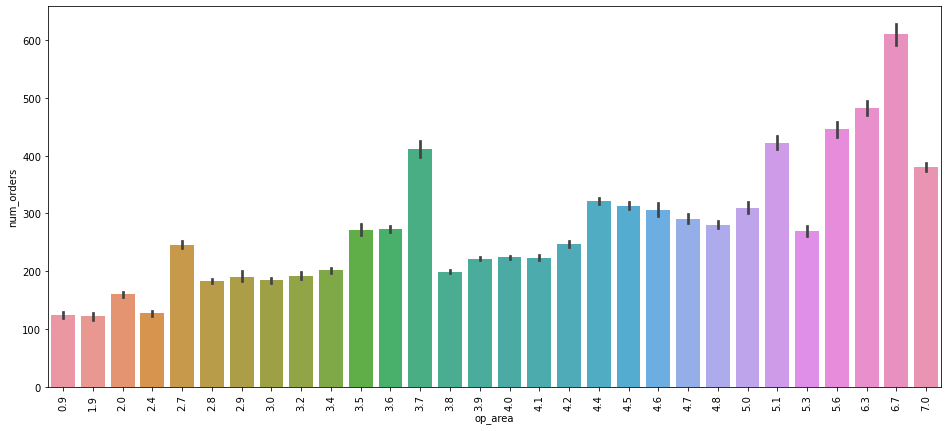

In [51]:
plt.figure(figsize = (16, 7))
sns.barplot(x=train['op_area'],y= train['num_orders'])
plt.xticks(rotation = '90')

(array([400., 450., 500., 550., 600., 650., 700., 750.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

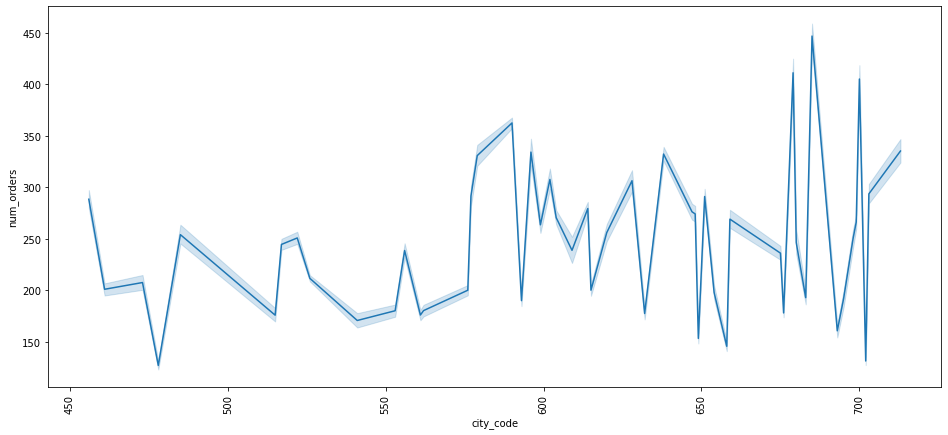

In [52]:
plt.figure(figsize = (16, 7))
sns.lineplot(x=train['city_code'],y= train['num_orders'])
plt.xticks(rotation = '90')

<AxesSubplot:xlabel='num_orders'>

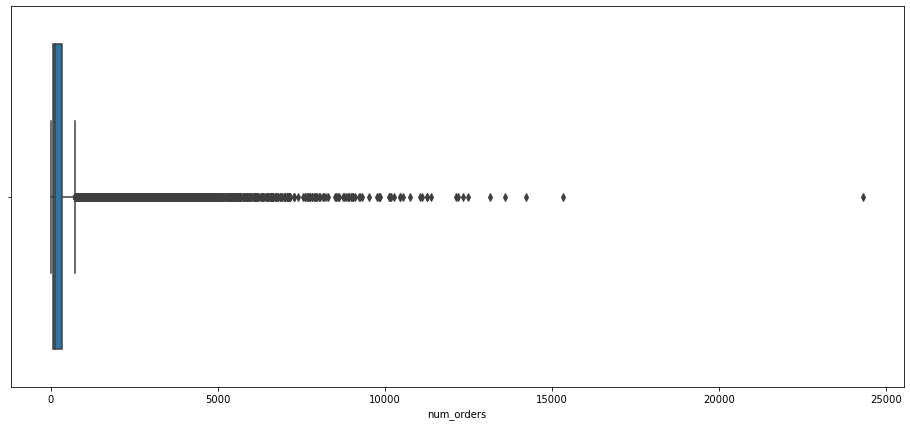

In [53]:
plt.figure(figsize = (16, 7))
sns.boxplot(x = 'num_orders', data = train)


<AxesSubplot:xlabel='region_code'>

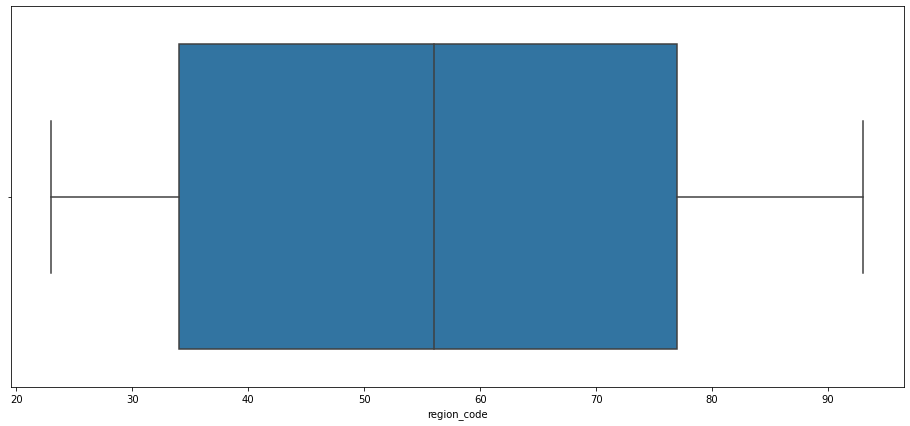

In [54]:
plt.figure(figsize = (16, 7))
sns.boxplot(x = 'region_code', data = train)

<Figure size 1152x504 with 0 Axes>

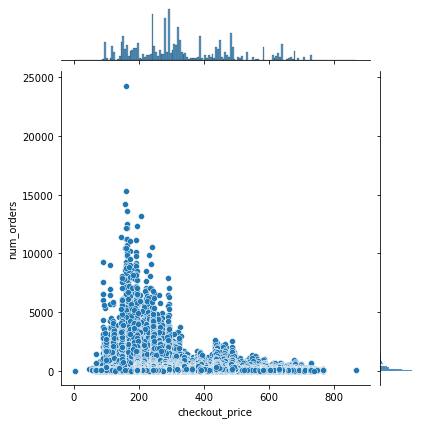

In [55]:
plt.figure(figsize = (16, 7))
sns.jointplot(x = 'checkout_price', y = 'num_orders', data = train)

<Figure size 1152x504 with 0 Axes>

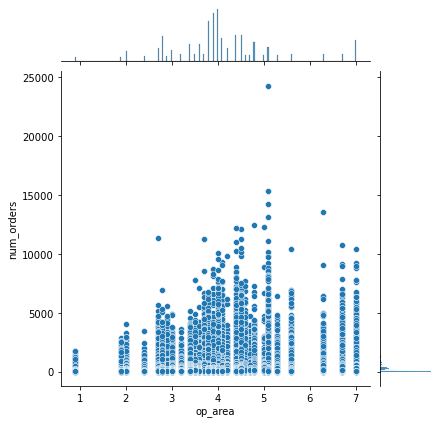

In [56]:
plt.figure(figsize = (16, 7))
sns.jointplot(x = 'op_area', y = 'num_orders', data = train)

<Figure size 1152x504 with 0 Axes>

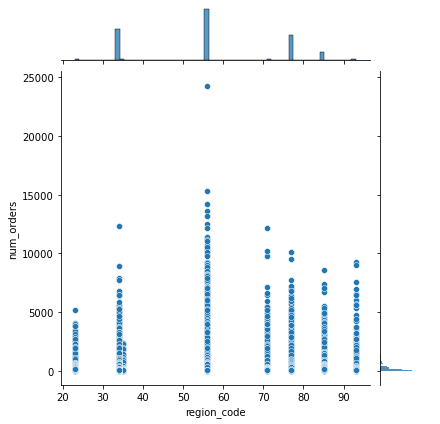

In [57]:
plt.figure(figsize = (16, 7))
sns.jointplot(x = 'region_code', y = 'num_orders', data = train)

<Figure size 1152x504 with 0 Axes>

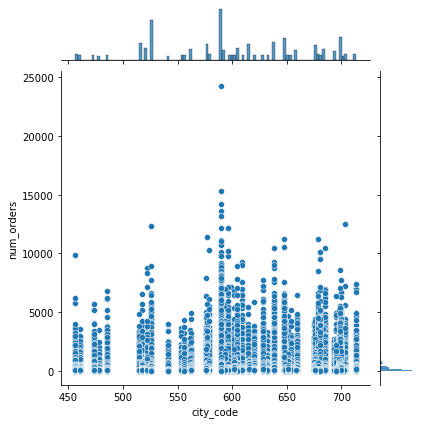

In [58]:
plt.figure(figsize = (16, 7))
sns.jointplot(x = 'city_code', y = 'num_orders', data = train)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'Beverages'),
  Text(1, 0, 'Rice Bowl'),
  Text(2, 0, 'Starters'),
  Text(3, 0, 'Pasta'),
  Text(4, 0, 'Sandwich'),
  Text(5, 0, 'Biryani'),
  Text(6, 0, 'Extras'),
  Text(7, 0, 'Pizza'),
  Text(8, 0, 'Seafood'),
  Text(9, 0, 'Other Snacks'),
  Text(10, 0, 'Desert'),
  Text(11, 0, 'Salad'),
  Text(12, 0, 'Fish'),
  Text(13, 0, 'Soup')])

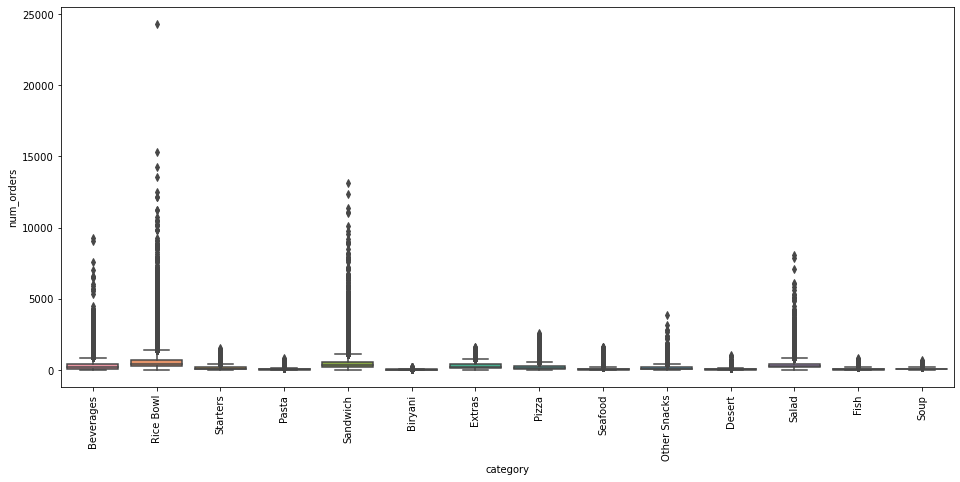

In [59]:
plt.figure(figsize = (16, 7))
sns.boxplot(x = 'category', y = 'num_orders', data = train)
plt.xticks(rotation = 90)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Thai'),
  Text(1, 0, 'Indian'),
  Text(2, 0, 'Italian'),
  Text(3, 0, 'Continental')])

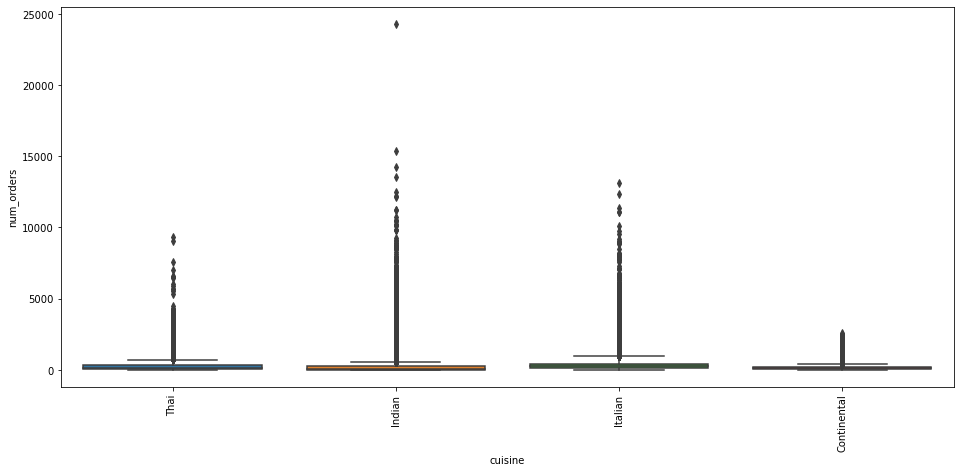

In [60]:
plt.figure(figsize = (16, 7))
sns.boxplot(x = 'cuisine',y = 'num_orders',data = train)
plt.xticks(rotation = 90)

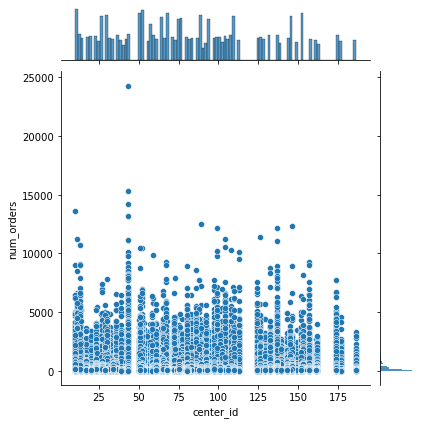

In [61]:
sns.jointplot(x = 'center_id', y = 'num_orders', data = train)

In [62]:
print("Total number of centers : ", train['center_id'].nunique())

Total number of centers :  77


In [63]:
print("Total Number of cities: ", train['city_code'].nunique())

Total Number of cities:  51


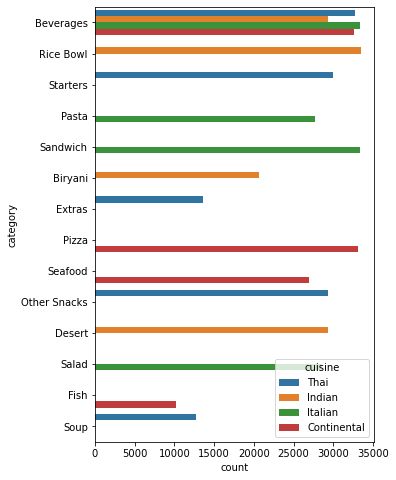

In [64]:
fig, ax = plt.subplots(figsize = (5, 8))
sns.countplot(y = train['category'], hue = train['cuisine'], ax = ax)
plt.show()

In [65]:
center_meal_train = (train['center_id'].astype(str) + "_" + train['meal_id'].astype(str)).unique()
print("There are", len(center_meal_train), "center-meal pairs in train data")


There are 3597 center-meal pairs in train data


In [66]:
center_meal_test = (test['center_id'].astype(str) + "_" + test['meal_id'].astype(str)).unique()
print("There are", len(center_meal_test), "center-meal pairs in train data")

There are 3548 center-meal pairs in train data


In [67]:
print("There are",len(set(center_meal_test) - set(center_meal_train)), "New center-meal pairs in test dataset which are not present in train dataset")
print(set(center_meal_test) - set(center_meal_train))

There are 3 New center-meal pairs in test dataset which are not present in train dataset
{'92_2104', '73_2956', '73_1571'}


In [68]:
test[(test['center_id'] == 73) & (test['meal_id'].isin([2956, 1571]))].shape[0]

11

In [69]:
test[(test['center_id'] == 92) & (test['meal_id'].isin([2104]))].shape[0]


2

In [70]:
outlier_index = train[(train['num_orders'] > 15000)].index


In [71]:
train.drop(outlier_index, inplace = True)


In [72]:
train['train_or_test'] = 'train'
test['train_or_test'] = 'test'

In [73]:
train['num_orders'] = np.log1p(train['num_orders'])


In [74]:
total_data = train.append(test).reset_index(drop = True)[train.columns]

In [75]:
total_data = total_data.sort_values(['center_id', 'meal_id', 'week']).reset_index(drop = True)

In [76]:
total_data['checkout_price'] = np.log1p(total_data['checkout_price'])
total_data['base_price'] = np.log1p(total_data['base_price'])


In [77]:
total_data['discount_on_base'] = (total_data['base_price'] - total_data['checkout_price']) / total_data['base_price']


In [78]:
total_data["discount_ratio"] = total_data["base_price"] / total_data["checkout_price"]


C:\Users\91949\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


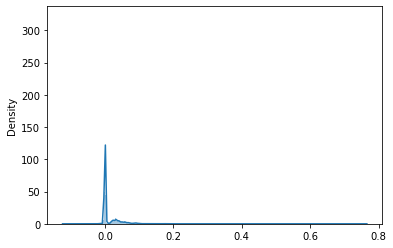

In [80]:
sns.distplot(x=total_data['discount_on_base'], bins = 500)
plt.show()

In [83]:
total_data['price_last_curr_diff'] = (total_data['checkout_price'].shift(1) - total_data['checkout_price']).fillna(1)/ total_data['checkout_price'].shift(1).fillna(1)


In [84]:
for _, r in total_data.groupby(['center_id', 'meal_id'])['week'].first().reset_index().iterrows():
    total_data.loc[(total_data['center_id'] == r['center_id']) & (total_data['meal_id'] == r['meal_id']) & (total_data['week'] == r['week']), 'price_last_curr_diff'] = total_data[(total_data['center_id'] == r['center_id']) & (total_data['meal_id'] == r['meal_id']) & (total_data['week'] != r['week'])]['price_last_curr_diff'].mean()
total_data['price_last_curr_diff'] = total_data['price_last_curr_diff'].fillna(0)

In [85]:
def create_sales_lag_feats(df, gpby_cols, target_col, lags):
    gpby = df.groupby(gpby_cols)
    for i in lags:
        df['_'.join([target_col, 'lag', str(i)])] = \
                gpby[target_col].shift(i).values + np.random.normal(scale = 1.6, size = (len(df),))
    return df

def create_sales_ewm_feats(df, gpby_cols, target_col, alpha = [0.9], shift = [1]):
    gpby = df.groupby(gpby_cols)
    for a in alpha:
        for s in shift:
            df['_'.join([target_col, 'lag', str(s), 'ewm', str(a)])] = \
                gpby[target_col].shift(s).ewm(alpha = a).mean().values
    return df


In [86]:
total_data = create_sales_lag_feats(total_data, gpby_cols = ['center_id','meal_id'], target_col = 'num_orders', 
                               lags = [10, 11, 12])

total_data = create_sales_ewm_feats(total_data, gpby_cols = ['center_id', 'meal_id'], 
                               target_col = 'num_orders',
                               alpha=[0.5], 
                               shift=[10,11,12,13,14,15])

In [87]:
total_data.head()


,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,...,price_last_curr_diff,num_orders_lag_10,num_orders_lag_11,num_orders_lag_12,num_orders_lag_10_ewm_0.5,num_orders_lag_11_ewm_0.5,num_orders_lag_12_ewm_0.5,num_orders_lag_13_ewm_0.5,num_orders_lag_14_ewm_0.5,num_orders_lag_15_ewm_0.5
0,1436842,1,10,1062,5.206147,5.206147,0,0,6.763885,590,...,0.000086,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1205013,2,10,1062,5.216890,5.211451,0,0,6.663133,590,...,-0.002064,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1447751,3,10,1062,5.222300,5.211451,0,0,6.747587,590,...,-0.001037,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1014968,4,10,1062,5.211451,5.216890,0,0,7.092574,590,...,0.002077,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1003563,5,10,1062,5.217053,5.206147,0,0,6.865891,590,...,-0.001075,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [88]:
gdf = total_data.groupby(["center_id", "week"])["id"].agg(['size']).reset_index()
gdf.columns = ["center_id", "week", "center_week_count"]
total_data = pd.merge(total_data,gdf, on = ["center_id", "week"], how = "left")

gdf = total_data.groupby(["center_id", "category"])["id"].count().reset_index()
gdf.columns = ["center_id", "category", "center_cat_count"]
total_data = pd.merge(total_data,gdf, on = ["center_id", "category"], how = "left")

gdf = total_data.groupby(["center_id", "category", "week"])["id"].count().reset_index()
gdf.columns = ["center_id", "category", "week", "center_cat_week_count"]
total_data = pd.merge(total_data,gdf, on = ["center_id", "category", "week"], how = "left")

gdf = total_data.groupby(["center_id", "cuisine"])["id"].count().reset_index()
gdf.columns = ["center_id", "cuisine", "center_cui_count"]
total_data = pd.merge(total_data,gdf, on = ["center_id", "cuisine"], how = "left")

In [89]:
gdf = total_data.groupby(["meal_id"])["id"].count().reset_index()
gdf.columns = ["meal_id", "meal_count"]
total_data = pd.merge(total_data,gdf, on = ["meal_id"], how = "left")

gdf = total_data.groupby(["region_code", "meal_id"])["id"].count().reset_index()
gdf.columns = ["region_code", "meal_id", "region_meal_count"]
total_data= pd.merge(total_data,gdf, on = ["region_code", "meal_id"], how = "left")

gdf = total_data.groupby(["meal_id", "week"])["id"].count().reset_index()
gdf.columns = ["meal_id", "week", "meal_week_count"]
total_data = pd.merge(total_data,gdf, on = ["meal_id", "week"], how = "left")

gdf =total_data.groupby(["center_type", "meal_id", "week"])["id"].count().reset_index()
gdf.columns = ["center_type", "meal_id", "week", "type_meal_week_count"]
total_data = pd.merge(total_data,gdf, on = ["center_type", "meal_id", "week"], how = "left")

gdf = total_data.groupby(["region_code", "meal_id", "week"])["id"].count().reset_index()
gdf.columns = ["region_code", "meal_id", "week", "region_meal_week_count"]
total_data = pd.merge(total_data,gdf, on = ["region_code", "meal_id", "week"], how = "left")

gdf =total_data.groupby(["city_code", "meal_id", "week"])["id"].count().reset_index()
gdf.columns = ["city_code", "meal_id", "week", "city_meal_week_count"]
total_data = pd.merge(total_data,gdf, on = ["city_code", "meal_id", "week"], how = "left")

In [90]:
total_data["meal_price_rank"] = total_data.groupby("meal_id")["checkout_price"].rank()
total_data["meal_city_price_rank"] = total_data.groupby(["meal_id", "city_code"])["checkout_price"].rank()
total_data["meal_region_price_rank"] = total_data.groupby(["meal_id", "region_code"])["checkout_price"].rank()
total_data["meal_week_price_rank"] = total_data.groupby(["meal_id", "week"])["checkout_price"].rank()

total_data["center_price_rank"] = total_data.groupby("center_id")["checkout_price"].rank()
total_data["center_week_price_rank"] = total_data.groupby(["center_id", "week"])["checkout_price"].rank()
total_data["center_cat_price_rank"] = total_data.groupby(["center_id", "category"])["checkout_price"].rank()

In [91]:
gdf = total_data.groupby(["meal_id"])["checkout_price"].agg(["min", "max", "mean", "std"]).reset_index()
gdf.columns = ["meal_id", "meal_price_min", "meal_price_max", "meal_price_mean", "meal_price_std"]
total_data = pd.merge(total_data,gdf, on = ["meal_id"], how = "left")

gdf = total_data.groupby(["meal_id"])["base_price"].agg(["min", "max", "mean", "std"]).reset_index()
gdf.columns = ["meal_id", "disc_price_min", "disc_price_max", "disc_price_mean", "disc_price_std"]
total_data = pd.merge(total_data,gdf, on = ["meal_id"], how = "left")

gdf = total_data.groupby(["city_code","meal_id", "week"])["checkout_price"].agg(["min", "max", "mean", "std"]).reset_index()
gdf.columns = ["city_code", "meal_id", "week", "meal_price2_min", "meal_price2_max", "meal_price2_mean", "meal_price2_std"]
total_data= pd.merge(total_data,gdf, on = ["city_code", "meal_id", "week"], how = "left")

gdf = total_data.groupby(["city_code", "category"])["checkout_price"].agg(["mean", "std"]).reset_index()
gdf.columns = ["city_code", "category", "meal_price3_mean", "meal_price3_std"]
total_datal = pd.merge(total_data,gdf, on = ["city_code", "category"], how = "left")

In [92]:
total_data['center_id'] = total_data['center_id'].astype(np.object)
total_data['meal_id'] = total_data['meal_id'].astype(np.object)
total_data['region_code'] = total_data['region_code'].astype(np.object)
total_datal['city_code'] = total_data['city_code'].astype(np.object)

C:\Users\91949\AppData\Local\Temp/ipykernel_3720/19819836.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  total_data['center_id'] = total_data['center_id'].astype(np.object)
C:\Users\91949\AppData\Local\Temp/ipykernel_3720/19819836.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  total_data['meal_id'] = total_data['meal_id'].astype(np.object)
C:\Users\91949\AppData\Local\Temp/ipykernel_3720/19819836.py:3: DeprecationWarning: `np.object` is a deprecated alias for the 

In [93]:
train_data = total_data.loc[total_data['train_or_test'] == 'train', :]
test_data = total_data.loc[total_data['train_or_test'] == 'test', :]


In [94]:
center_meal_mean = train_data.groupby(['center_id', 'meal_id'])['num_orders'].mean()
center_meal_mean = center_meal_mean.reset_index()
center_meal_mean = center_meal_mean.rename(columns = {'num_orders':'avg_orders'})
train_data = pd.merge(train_data,center_meal_mean, how = 'left', left_on = ['center_id', 'meal_id'], right_on = ['center_id', 'meal_id'])
test_data = pd.merge(test_data,center_meal_mean, how = 'left', left_on = ['center_id', 'meal_id'], right_on = ['center_id', 'meal_id'])
center_mean = train_data.groupby('center_id')['num_orders'].mean()
center_mean = center_mean.reset_index()
center_mean = center_mean.rename(columns = {'num_orders':'avg_center'})
train_data = pd.merge(train_data,center_mean, how = 'left', left_on = ['center_id'], right_on = ['center_id'])
test_data = pd.merge(test_data,center_mean, how = 'left', left_on = ['center_id'], right_on = ['center_id'])
meal_mean = train_data.groupby('meal_id')['num_orders'].mean()
meal_mean = meal_mean.reset_index()
meal_mean = meal_mean.rename(columns = {'num_orders':'avg_meal'})
train_data = pd.merge(train_data, meal_mean,how = 'left',left_on = ['meal_id'], right_on = ['meal_id'])
test_data = pd.merge(test_data, meal_mean,how = 'left',left_on = ['meal_id'], right_on = ['meal_id'])

In [95]:
train_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 456546 entries, 0 to 456545
Data columns (total 60 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id                         456546 non-null  int64  
 1   week                       456546 non-null  int64  
 2   center_id                  456546 non-null  object 
 3   meal_id                    456546 non-null  object 
 4   checkout_price             456546 non-null  float64
 5   base_price                 456546 non-null  float64
 6   emailer_for_promotion      456546 non-null  int64  
 7   homepage_featured          456546 non-null  int64  
 8   num_orders                 456546 non-null  float64
 9   city_code                  456546 non-null  int64  
 10  region_code                456546 non-null  object 
 11  center_type                456546 non-null  object 
 12  op_area                    456546 non-null  float64
 13  category                   45

In [96]:
test_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 32573 entries, 0 to 32572
Data columns (total 60 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         32573 non-null  int64  
 1   week                       32573 non-null  int64  
 2   center_id                  32573 non-null  object 
 3   meal_id                    32573 non-null  object 
 4   checkout_price             32573 non-null  float64
 5   base_price                 32573 non-null  float64
 6   emailer_for_promotion      32573 non-null  int64  
 7   homepage_featured          32573 non-null  int64  
 8   num_orders                 0 non-null      float64
 9   city_code                  32573 non-null  int64  
 10  region_code                32573 non-null  object 
 11  center_type                32573 non-null  object 
 12  op_area                    32573 non-null  float64
 13  category                   32573 non-null  obj

In [97]:
avoid_column = ['id', 'num_orders', 'train_or_test']

In [98]:
features = [col for col in test_data.columns if col not in avoid_column]

In [99]:
features

['week',
 'center_id',
 'meal_id',
 'checkout_price',
 'base_price',
 'emailer_for_promotion',
 'homepage_featured',
 'city_code',
 'region_code',
 'center_type',
 'op_area',
 'category',
 'cuisine',
 'discount_on_base',
 'discount_ratio',
 'price_last_curr_diff',
 'num_orders_lag_10',
 'num_orders_lag_11',
 'num_orders_lag_12',
 'num_orders_lag_10_ewm_0.5',
 'num_orders_lag_11_ewm_0.5',
 'num_orders_lag_12_ewm_0.5',
 'num_orders_lag_13_ewm_0.5',
 'num_orders_lag_14_ewm_0.5',
 'num_orders_lag_15_ewm_0.5',
 'center_week_count',
 'center_cat_count',
 'center_cat_week_count',
 'center_cui_count',
 'meal_count',
 'region_meal_count',
 'meal_week_count',
 'type_meal_week_count',
 'region_meal_week_count',
 'city_meal_week_count',
 'meal_price_rank',
 'meal_city_price_rank',
 'meal_region_price_rank',
 'meal_week_price_rank',
 'center_price_rank',
 'center_week_price_rank',
 'center_cat_price_rank',
 'meal_price_min',
 'meal_price_max',
 'meal_price_mean',
 'meal_price_std',
 'disc_price_min

In [100]:
categorical_features_indices = np.where(train_data[features].dtypes == 'object')[0]
categorical_features_indices

array([ 1,  2,  8,  9, 11, 12], dtype=int64)

In [101]:
model = CatBoostRegressor(
    iterations = 2000, 
    learning_rate = 0.02, 
    max_depth = 8, 
    l2_leaf_reg = 10, 
    loss_function = 'RMSE',
    random_seed = 22,
    od_type = 'Iter',
    od_wait = 25,
    verbose = 100,
    use_best_model = True
    )

In [106]:
errcb = []
y_pred_test = []

fold = KFold(n_splits = 5,shuffle = True, random_state = 22)

for train_index, test_index in fold.split(train_data[features],train_data['num_orders']):
    X_train, X_valid = train_data[features].iloc[train_index], train_data[features].iloc[test_index]
    y_train, y_valid = train_data['num_orders'][train_index],train_data['num_orders'][test_index]
    model.fit(X_train,y_train,
              cat_features = categorical_features_indices,
              eval_set = (X_valid, y_valid),
              early_stopping_rounds = 300,
              verbose = 100)
    preds = model.predict(X_valid)
    print("err: ", np.sqrt(mean_squared_error(y_valid,preds)))
    errcb.append(np.sqrt(mean_squared_error(y_valid,preds)))
    p = model.predict(test_data[features])
    y_pred_test.append(p)

0:	learn: 1.1847118	test: 1.1859358	best: 1.1859358 (0)	total: 493ms	remaining: 16m 26s
100:	learn: 0.5388927	test: 0.5405548	best: 0.5405548 (100)	total: 47.5s	remaining: 14m 53s
200:	learn: 0.4976032	test: 0.4994008	best: 0.4994008 (200)	total: 1m 32s	remaining: 13m 50s
300:	learn: 0.4871063	test: 0.4892112	best: 0.4892112 (300)	total: 2m 17s	remaining: 12m 56s
400:	learn: 0.4807223	test: 0.4831623	best: 0.4831623 (400)	total: 3m 2s	remaining: 12m 8s
500:	learn: 0.4758457	test: 0.4786221	best: 0.4786221 (500)	total: 3m 47s	remaining: 11m 20s
600:	learn: 0.4721241	test: 0.4752255	best: 0.4752255 (600)	total: 4m 31s	remaining: 10m 32s
700:	learn: 0.4688031	test: 0.4722587	best: 0.4722587 (700)	total: 5m 16s	remaining: 9m 47s
800:	learn: 0.4658342	test: 0.4696419	best: 0.4696419 (800)	total: 6m 2s	remaining: 9m 2s
900:	learn: 0.4634185	test: 0.4675829	best: 0.4675829 (900)	total: 6m 48s	remaining: 8m 18s
1000:	learn: 0.4613852	test: 0.4658593	best: 0.4658593 (1000)	total: 7m 34s	remaini

200:	learn: 0.4977777	test: 0.4976216	best: 0.4976216 (200)	total: 1m 36s	remaining: 14m 24s
300:	learn: 0.4874362	test: 0.4875342	best: 0.4875342 (300)	total: 2m 26s	remaining: 13m 48s
400:	learn: 0.4810023	test: 0.4812931	best: 0.4812931 (400)	total: 3m 14s	remaining: 12m 55s
500:	learn: 0.4762785	test: 0.4768119	best: 0.4768119 (500)	total: 4m	remaining: 12m
600:	learn: 0.4725017	test: 0.4733126	best: 0.4733126 (600)	total: 4m 47s	remaining: 11m 9s
700:	learn: 0.4691096	test: 0.4701388	best: 0.4701388 (700)	total: 5m 37s	remaining: 10m 25s
800:	learn: 0.4663837	test: 0.4676572	best: 0.4676572 (800)	total: 6m 26s	remaining: 9m 39s
900:	learn: 0.4640282	test: 0.4655594	best: 0.4655594 (900)	total: 7m 15s	remaining: 8m 50s
1000:	learn: 0.4619129	test: 0.4637135	best: 0.4637135 (1000)	total: 8m 2s	remaining: 8m 1s
1100:	learn: 0.4600320	test: 0.4620672	best: 0.4620672 (1100)	total: 8m 49s	remaining: 7m 12s
1200:	learn: 0.4587693	test: 0.4609872	best: 0.4609872 (1200)	total: 9m 27s	remai

In [107]:
model.fit(X = train_data[features], y = train_data['num_orders'], cat_features = categorical_features_indices,
          eval_set = (X_valid, y_valid), verbose = 100)

0:	learn: 1.1847998	test: 1.1856397	best: 1.1856397 (0)	total: 426ms	remaining: 14m 12s
100:	learn: 0.5389422	test: 0.5383869	best: 0.5383869 (100)	total: 38.5s	remaining: 12m 3s
200:	learn: 0.4976111	test: 0.4970496	best: 0.4970496 (200)	total: 1m 15s	remaining: 11m 17s
300:	learn: 0.4870070	test: 0.4863732	best: 0.4863732 (300)	total: 1m 52s	remaining: 10m 33s
400:	learn: 0.4806400	test: 0.4798821	best: 0.4798821 (400)	total: 2m 28s	remaining: 9m 52s
500:	learn: 0.4758466	test: 0.4749852	best: 0.4749852 (500)	total: 3m 4s	remaining: 9m 13s
600:	learn: 0.4722692	test: 0.4713289	best: 0.4713289 (600)	total: 3m 40s	remaining: 8m 33s
700:	learn: 0.4691663	test: 0.4681491	best: 0.4681491 (700)	total: 4m 17s	remaining: 7m 57s
800:	learn: 0.4663235	test: 0.4652648	best: 0.4652648 (800)	total: 4m 56s	remaining: 7m 24s
900:	learn: 0.4638972	test: 0.4628267	best: 0.4628267 (900)	total: 5m 34s	remaining: 6m 47s
1000:	learn: 0.4617316	test: 0.4606204	best: 0.4606204 (1000)	total: 6m 11s	remainin

In [108]:
pred = model.predict(test_data[features])


In [109]:
pred = (np.exp(pred) - 1)


In [110]:
submission = pd.DataFrame({'id':test['id'],'num_orders':pred})
submission = submission[['id','num_orders']]
submission.head()


,id,num_orders
0,1028232,1001.093110
1,1262649,1015.085122
2,1453211,991.245915
3,1262599,813.534568
4,1495848,997.663084


In [111]:
submission.to_csv('catboost_1.csv', index = False)

In [112]:
feature_score = pd.DataFrame(list(zip(train_data[features].dtypes.index, model.get_feature_importance(Pool(train_data[features], label=train_data['num_orders'], cat_features=categorical_features_indices)))),
                columns=['Feature','Score'])

feature_score = feature_score.sort_values(by = 'Score', ascending = False, inplace = False, 
                                          kind = 'quicksort', na_position = 'last')


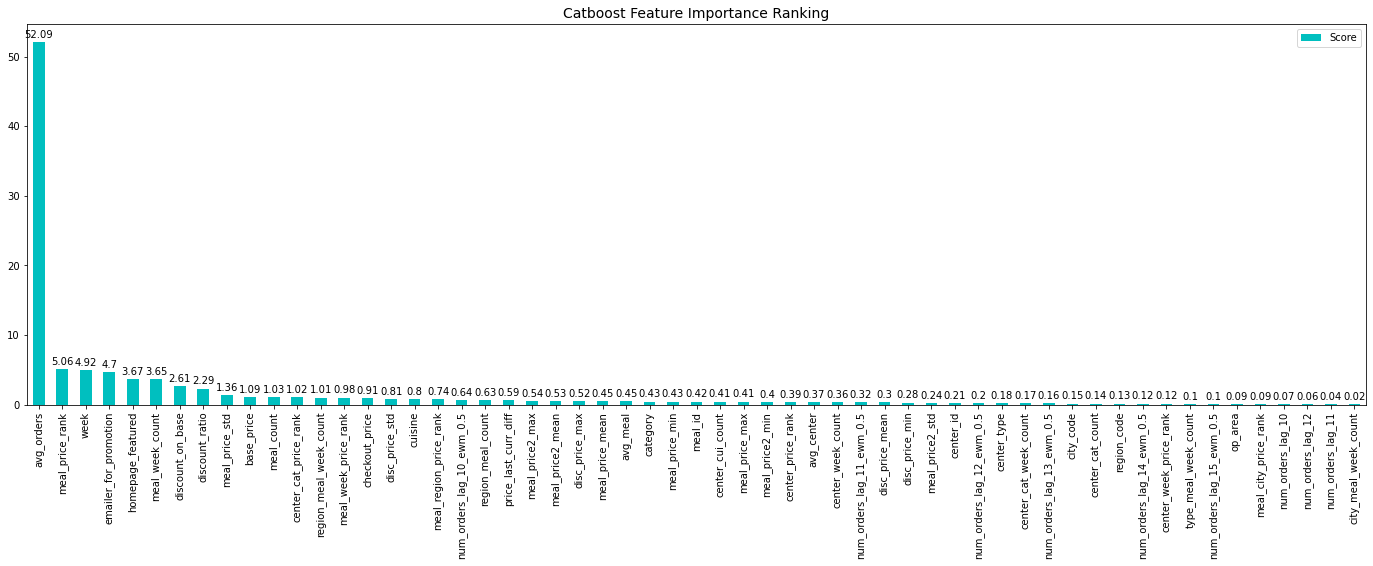

In [113]:
plt.rcParams["figure.figsize"] = (24,7)
ax = feature_score.plot('Feature', 'Score', kind = 'bar', color = 'c')
ax.set_title("Catboost Feature Importance Ranking", fontsize = 14)
ax.set_xlabel('')

rects = ax.patches

labels = feature_score['Score'].round(2)

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 0.35, label, ha = 'center', va = 'bottom')

plt.show()
